#                                       Healthcare_Predictions

In [1]:
# import all Required libaires
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# read_data 

helthcare_data = pd.read_csv('helthcare.csv')


# separete data 

y = helthcare_data['year']

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

print(y)

0     2000
1     2001
2     2002
3     2003
4     2004
5     2005
6     2006
7     2007
8     2008
9     2009
10    2010
11    2012
12    2013
13    2014
14    2015
15    2016
16    2017
Name: year, dtype: int64


            frequency
year                 
2000-01-01   29119.30
2001-01-01   29137.86
2002-01-01   29707.90
2003-01-01   29820.22
2004-01-01   29498.77
2005-01-01   29244.48
2006-01-01   28833.40
2007-01-01   28167.90
2008-01-01   27555.90
2009-01-01   27104.73
2010-01-01   26686.35
2012-01-01   25125.28
2013-01-01   24432.72
2014-01-01   23524.46
2015-01-01   23217.29
2016-01-01   22540.39
2017-01-01   21830.76


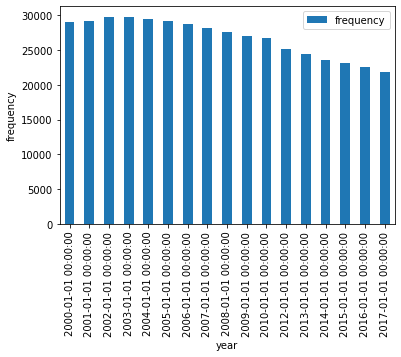

In [3]:
#changing year datatime format beaccause arima model working time series forecast 

helthcare_data['year']=pd.to_datetime(helthcare_data['year'], format='%Y')

helthcare_data.set_index(['year'], inplace=True)

print(helthcare_data)

# Plot the data
# checiking Frequncy in Year Wise 

helthcare_data.plot(kind='bar')
plt.ylabel('frequency')
plt.xlabel('year')
plt.show()

In [171]:
# describe the data

helthcare_data.describe()

,frequency
count,17.000000
mean,26796.924118
std,2774.609885
min,21830.760000
25%,24432.720000
50%,27555.900000
75%,29137.860000
max,29820.220000


In [172]:
# checking null values in yourdata

helthcare_data.isnull().sum()

frequency    0
dtype: int64

In [173]:

# Arima model intilation

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [176]:
# split the train and test and data 
train_data = helthcare_data['2000-01-01':'2009-01-01']
test_data = helthcare_data['2010-01-01':'2017-01-01']



In [177]:
# applly the data model 

warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

In [178]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 2.0 for model SARIMAX(0, 0, 0)x(0, 1, 0, 12)


In [179]:

# Let's fit this model

mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

In [186]:
# predict 2019 data 
pred0 = results.get_prediction(start='2019-01-01', dynamic=False)
pred0_ci = pred0.conf_int()


print(pred2.predicted_mean['2019-01-01':'2019-12-01' ])

2019-01-01    28167.9
Freq: AS-JAN, dtype: float64


In [187]:
# predict 2025 data
pred1 = results.get_prediction(start='2025-01-01', dynamic=True)
pred1_ci = pred1.conf_int()

print(pred2.predicted_mean['2025-01-01':'2025-12-01' ])

Series([], Freq: AS-JAN, dtype: float64)


In [188]:
# predict the 2019 data

pred2 = results.get_forecast('2019-01-01')
pred2_ci = pred2.conf_int()

print(pred2.predicted_mean['2019-01-01':'2019-12-01' ])

2019-01-01    28167.9
Freq: AS-JAN, dtype: float64


In [189]:
# predict the 2020 data

pred2 = results.get_forecast('2020-01-01')
pred2_ci = pred2.conf_int()

print(pred2.predicted_mean['2020-01-01':'2020-12-01' ])

2020-01-01    27555.9
Freq: AS-JAN, dtype: float64


## Predictions the data in 2018 to 2020 future predictions based on previous data........

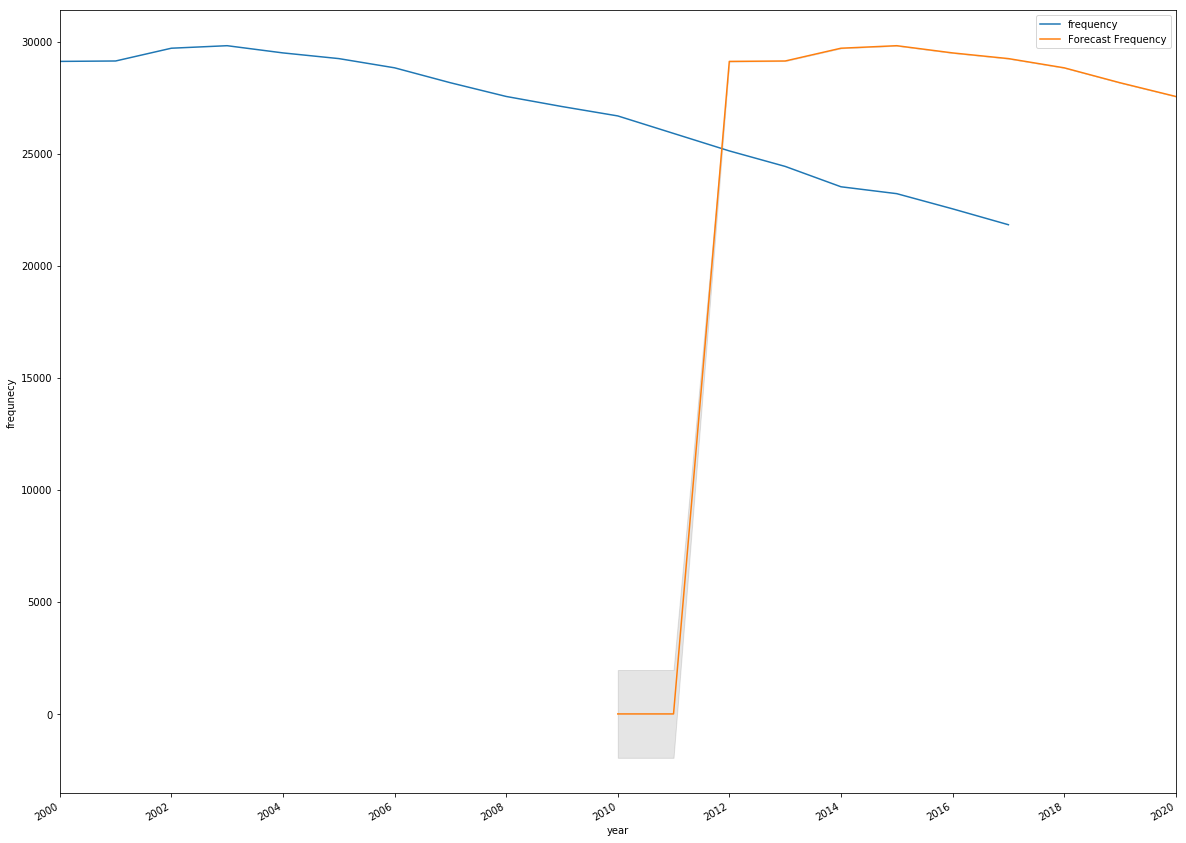

In [192]:
# predict the future prediction 2018- 2020


ax = helthcare_data.plot(figsize=(20, 16))

# pred0.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast (get_predictions, dynamic=False)')
# pred1.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_predictions, dynamic=True)')

pred2.predicted_mean.plot(ax=ax, label='Forecast Frequency')
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('frequnecy')
plt.xlabel('year')
plt.legend()
plt.show()

##                 THIS MAIN PART CHECK ERROR RATE 

In [200]:
#checking error Rate in Your Predection 

# this part is very importatnt part


prediction = pred2.predicted_mean['2020-01-01':'2020-12-01'].values
# flatten nested list
truth = list(itertools.chain.from_iterable(test_data.values))
# Mean Absolute Percentage Error
MAPE = np.mean(np.abs((truth - prediction) / truth)) * 100

print('The Mean Absolute Percentage Error for the forecast of year 2019 is {:.2f}%'.format(MAPE))

The Mean Absolute Percentage Error for the forecast of year 2019 is 15.72%
